<a href="https://colab.research.google.com/github/AdrianaCaetano/AI/blob/main/571_AI_assign5A_copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 5A - Linear Regression

CS 571 AI - Prof Gutta - Spring 2022

Project: Linear Regression for Diabetes Dataset


Outputs are best seen in the colab notebook.

# Step 1

STEP 1 - Include a basic description of the data (what are the features and labels) 

The dataset can be downloaded from the Sklearn Toy Dataset section. In the website description, the diabetes dataset contains 10 baseline variables of 442 individuals, and the reponse of interest. 

Attributes or features in the diabetes dataset: 

1. age in years

2. sex

3. bmi body mass index

4. bp average blood pressure

5. s1 total serum cholesterol

6. s2 low-density lipoproteins

7. s3 high-density lipoproteins

8. s4 total cholesterol / HDL

9. s5 possibly log of serum triglycerides level

10. s6 glu, blood sugar level

Target or Label: a quantitative measure of disease progression one year after baseline


Each of these 10 feature variables have been mean centered and scaled by the standard deviation times n_samples (i.e. the sum of squares of each column totals 1).





In [ ]:
# import diabetes dataset using sklearn 
from sklearn.datasets import load_diabetes 
d_data = load_diabetes()

# Get attributes /features 
X = d_data.data
n_samples, n_features = X.shape

# Print dataset size and attributes description
print("Number of samples:", n_samples)
print("Number of features:", n_features)
print("Features: ", d_data.feature_names)

# Get targets /labels
y = d_data.target

Number of samples: 442
Number of features: 10
Features:  ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [ ]:
#Use pandas dataframes to get familiar with the dataset

import pandas as pd
    
diabetes_df = pd.DataFrame(d_data.data, columns=d_data.feature_names)
diabetes_df["Target"] = y

print("\nThe first 10 lines of diabetes dataset")
diabetes_df.head(10)



The first 10 lines of diabetes dataset


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504,310.0


In [ ]:
print("diabetes dataset info")
diabetes_df.info()

diabetes dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  Target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [ ]:
print("diabetes dataset stats")
diabetes_df.describe()

diabetes dataset stats


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [ ]:
print("\nMissing values:\n", diabetes_df.isnull().sum())


Missing values:
 age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
Target    0
dtype: int64


From the tables we can see that the dataset is complete and has no missing values on any of the 10 attributes.

Heatmap
The linear correlation in between attributes and target, and in between themselves


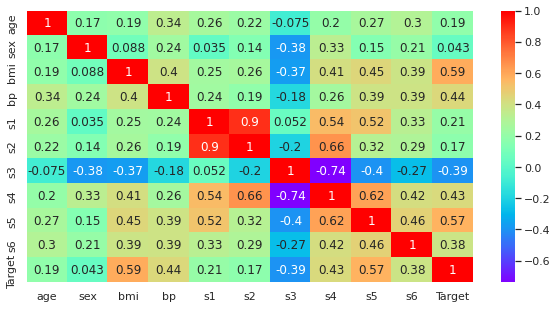

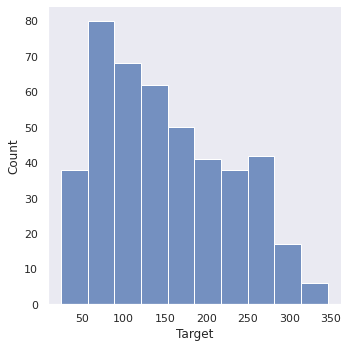

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="dark", color_codes=True)

#Visualize the dataset with 1 feature using histograms or with 2 features using scaterplot
#sns.pairplot(diabetes_df, hue="Target", height=4, diag_kind="kde", corner=True)
#plt.show()

# heatmap 
print("Heatmap\nThe linear correlation in between attributes and target, and in between themselves")
plt.figure(figsize = (10,5))
sns.heatmap(diabetes_df.corr(), annot = True, cmap="rainbow")
plt.show()

# clusterplot
#g = sns.clustermap(diabetes_df)

# Analytics 
sns.displot(diabetes_df['Target'])

# Step 2

STEP 2 - Split data into training and testing sets

In [ ]:
# import diabetes dataset using sklearn 
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
diabetes = load_diabetes()
X = diabetes.data
Y = diabetes.target

# Split the dataset into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100) 
# define random_state to avoid a different random value, and subsequently avoid a different dataset split, each time we run the program 

print("Train dataset:", X_train.shape)
print("Test dataset:", X_test.shape)

Train dataset: (309, 10)
Test dataset: (133, 10)


# Step 3


STEP 3 - Perform pre-processing if necessary.

On analysis, we have seen that there is no missing data and all the data have conistent formats and values. Also, as seen in the data description each of the 10 feature variables have been mean centered and scaled by the standard deviation times n_samples. Therefore, preprocessing is not required.

# Step 4

STEP 4 -Fit the linear regression on the training dataset.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

# create the Linear Regression model (default)
reg = LinearRegression()  
reg.fit(X_train, y_train)
y_pred = reg.predict(X_train)
score=r2_score(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train, y_pred)
print('coefficient of determination or r2_score:', score)
print('root mean squared error:', rmse) 
print('mean absolute error:', mae) 

coefficient of determination or r2_score: 0.517904977023855
root mean squared error: 54.48342413858927
mean absolute error: 44.08712596343271


# Step 5


STEP 5 - Tune hyperparameters (if any) based on the performance on the validation set or using cross-validation. Plot the hyperparameter value on the x-axis and performance metric on the y-axis


There are no hyperparameters to tune for linear regression. However, let's try fitting the dataset using kFold cross validation and check if there is any improvement in the model. We will also try out few parameters fit_intercept and normalize.

In [ ]:
import matplotlib.pyplot as plt
from prettytable import PrettyTable

t = PrettyTable(['kFold', 'root mean squared error','coefficient of determination','mean absolute error'])
# Evaluate the models for different k folds on cross validation
for n in range (2, 11):
  # Prepare the k-fold cross validation
  kf = KFold(random_state=10, shuffle=True, n_splits= n) # random_state= an int for reproducible output across multiple function calls
  score1 = np.sqrt(-1*cross_val_score(reg, X_train, y_train, scoring='neg_mean_squared_error', cv=kf, n_jobs=-1))
  score2 = cross_val_score(reg, X_train, y_train, scoring='r2', cv=kf, n_jobs=-1)
  score3 = -1*cross_val_score(reg, X_train, y_train, scoring='neg_mean_absolute_error', cv=kf, n_jobs=-1)
  t.add_row([n,np.mean(score1),np.mean(score2),np.mean(score3)])
print(t)

t1 = PrettyTable(['parameter', 'root mean squared error','coefficient of determination','mean absolute error'])
# create the Linear Regression model with fit_intercept=False
reg1 = LinearRegression(fit_intercept=False)  
reg1.fit(X_train, y_train)
y_pred1 = reg1.predict(X_train)
score1=r2_score(y_train, y_pred1)
mse1 = mean_squared_error(y_train, y_pred1)
rmse1 = np.sqrt(mse1)
mae1 = mean_absolute_error(y_train, y_pred1)
t1.add_row(['fit_intercept=False',rmse1,score1,mae1])

# create the Linear Regression model with normalize=True
reg2 = LinearRegression(normalize=True)  
reg2.fit(X_train, y_train)
y_pred2 = reg2.predict(X_train)
score2=r2_score(y_train, y_pred2)
mse2 = mean_squared_error(y_train, y_pred2)
rmse2 = np.sqrt(mse2)
mae2 = mean_absolute_error(y_train, y_pred2)
t1.add_row(['normalize=True',rmse2,score2,mae2])

print(t1)

+-------+-------------------------+------------------------------+---------------------+
| kFold | root mean squared error | coefficient of determination | mean absolute error |
+-------+-------------------------+------------------------------+---------------------+
|   2   |    58.58616552062358    |     0.42929794174243663      |  47.967873647962094 |
|   3   |    56.64163023453738    |     0.46458683562026093      |  46.26849939629469  |
|   4   |    56.22974400513495    |     0.46747327509056213      |  45.618721040195574 |
|   5   |    56.366544104999605   |      0.4557713283822203      |  45.693036010812236 |
|   6   |    55.89470290011658    |      0.4640185151810324      |  45.51438523307931  |
|   7   |    56.73710274069986    |     0.44363577850655866      |  46.31398527011962  |
|   8   |    56.14936900893552    |      0.444452837306928       |  45.887392388206386 |
|   9   |    56.015403562691645   |     0.44787643026971463      |  45.72339747655775  |
|   10  |     55.8453

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


Based on the results of the tests above, we see there is no improvement. Since there are no hyperparameters, we do not have plots.

Lets try feature selection now:

In [ ]:
from sklearn.feature_selection import RFE

t = PrettyTable(['number of features', 'root mean squared error','coefficient of determination','mean absolute error'])
# Evaluate the models for n different features
for n in range (1,11):
  s = RFE(reg, n_features_to_select=n)
  s = s.fit(X_train, y_train)
  y_pred3 = s.predict(X_train)
  score3=r2_score(y_train, y_pred3)
  mse3 = mean_squared_error(y_train, y_pred3)
  rmse3 = np.sqrt(mse3)
  mae3 = mean_absolute_error(y_train, y_pred3)
  t.add_row([n,rmse3,score3,mae3])
print(t)

+--------------------+-------------------------+------------------------------+---------------------+
| number of features | root mean squared error | coefficient of determination | mean absolute error |
+--------------------+-------------------------+------------------------------+---------------------+
|         1          |    63.596821381475905   |      0.3431371813669879      |  53.443745381141206 |
|         2          |     57.5294902651246    |     0.46249202537173373      |  47.543400124474616 |
|         3          |    56.58505939494294    |     0.47999512862886373      |  46.165968866116856 |
|         4          |    55.42383077646352    |      0.5011190277346176      |  45.20523969254323  |
|         5          |    55.265824699331496   |      0.5039594616296521      |  44.966818300095476 |
|         6          |    54.60678010989971    |      0.5157194821503959      |  44.082640579316475 |
|         7          |    54.580902967053824   |      0.5161783565546176      |  4

So we see again that we get the best result when all 10 features are selected. So we will select the default model.

# Step 6


STEP 6 - Evaluate the model on test data and generate a performance report 


There are 3 metrics we used for model evaluation in linear regression:


1.   R Square or Co-efficient of determination
2.   Root Mean Square Error(RMSE)
3.   Mean Absolute Error(MAE)


  
  












In [ ]:
y_pred = reg.predict(X_test)
score=r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
print('coefficient of determination: ',score)
print('root mean squared error:', rmse)
print('mean absolute error:', mae) 


coefficient of determination:  0.4929329680070461
root mean squared error: 51.83774341914193


Since there were no hyperparameters, we tried to check what happens if we do kFold cross validation, use in-built parameters or select only few features. We observed that none of these methods improved the performance of the modesl. We evaluated the model on the default model initially used and found that **coefficient of determination also called Rsquare score is 0.4929329680070461 and root mean squared error is 51.83774341914193.**